# Computational Social Science Project #3 

**Enter your Name:** Chuxuan Gao

*Semester:* Fall 2024

## 1. Introduction

### Load data 

In [1]:
#
# load libraries
# -----------
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelBinarizer

# There are a few warnings that will appear that will not affect your analysis. Run this code to ignore. 
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore')

# Make sure to import other libraries that will be necessary for training models!
from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold, cross_val_score, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import make_scorer, accuracy_score, recall_score, precision_score, f1_score
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier, StackingClassifier
import xgboost as xgb
from sklearn.linear_model import LogisticRegression

from scipy.stats import randint
from sklearn.utils.class_weight import compute_class_weight



from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from collections import Counter

In [157]:
import random

np.random.seed(10)

random.seed(10)

from sklearn.utils import check_random_state
RANDOM_STATE = 10

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

In [159]:
#
# read in "Inspections Data 2011-2013" csv data
# -----------
chicago_inspections_2011_to_2013 = pd.read_csv("data/Chicago Inspections 2011-2013.csv", 
                                              low_memory=False)

#
# read in  "Inspections Data 2014_updated" csv data
# -----------
chicago_inspections_2014 = pd.read_csv("data/Chicago Inspections 2014_updated.csv",  # be sure to use the "updated" data here
                                      low_memory=False)

In [160]:
# look at the inspections data
chicago_inspections_2011_to_2013.head()

,Inspection_ID,Inspection_Date,DBA_Name,AKA_Name,License,Facility_Type,Risk,Address,City,State,Zip,Inspection_Type,Results,Latitude,Longitude,Location,Facility_Type_Clean,criticalCount,seriousCount,minorCount,pass_flag,fail_flag,pastFail,pastCritical,pastSerious,pastMinor,timeSinceLast,firstRecord,ID,LICENSE_ID,ACCOUNT_NUMBER,LEGAL_NAME,DOING_BUSINESS_AS_NAME,ADDRESS,CITY,STATE,ZIP_CODE,WARD,PRECINCT,WARD_PRECINCT,POLICE_DISTRICT,LICENSE_CODE,LICENSE_DESCRIPTION,BUSINESS_ACTIVITY_ID,BUSINESS_ACTIVITY,LICENSE_NUMBER,APPLICATION_TYPE,LICENSE_TERM_START_DATE,LICENSE_TERM_EXPIRATION_DATE,LICENSE_STATUS,LATITUDE,LONGITUDE,minDate,maxDate,ageAtInspection,consumption_on_premises_incidental_activity,tobacco,package_goods,outdoor_patio,public_place_of_amusement,limited_business_license,childrens_services_facility_license,tavern,regulated_business_license,filling_station,caterers_liquor_license,mobile_food_license,precipIntensity,temperatureMax,windSpeed,humidity,heat_burglary,heat_garbage,heat_sanitation,criticalFound
0,269961,2013-01-31,SEVEN STAR,SEVEN STAR,30790,Grocery Store,Risk 3 (Low),3352 N BROADWAY,CHICAGO,IL,60657.0,Canvass,Pass,41.943359,-87.644999,"(41.943359344775146, -87.64499875300952)",Other,0,0,2,1,0,0,0,0,0,2.0,1,30790-20110416,2081412.0,63759.0,VIRGINIA DELA ROSA,SEVEN STAR,3352 N BROADWAY 1,CHICAGO,IL,60657.0,44.0,33.0,44-33,19.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,30790.0,RENEW,2011-04-16,2013-04-15,AAI,41.943359,-87.644999,2002-02-16,2015-04-15,10.964384,0,1,0,0,0,1,0,0,0,0,0,0,0.014587,53.496667,13.340000,0.900000,26.992376,12.768572,37.748787,0
1,507211,2011-10-18,PANERA BREAD,PANERA BREAD,1475890,Restaurant,Risk 1 (High),6059 N LINCOLN AVE,CHICAGO,IL,60659.0,Canvass,Pass,41.991919,-87.709631,"(41.99191947239194, -87.70963133440333)",Restaurant,0,0,3,1,0,0,0,0,0,2.0,1,1475890-20110416,2081695.0,207283.0,"PANERA, LLC",PANERA BREAD,6059 N LINCOLN AVE C,CHICAGO,IL,60659.0,50.0,23.0,50-23,24.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1475890.0,RENEW,2011-04-16,2013-04-15,AAI,41.991919,-87.709631,2004-05-05,2019-04-15,7.457534,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,13.976557,12.895485,15.412267,0
2,507212,2011-10-18,LITTLE QUIAPO RESTAURANT,LITTLE QUIAPO RESTAURANT,1740130,Restaurant,Risk 1 (High),6259 N MCCORMICK RD,CHICAGO,IL,60659.0,Canvass,Fail,41.995632,-87.712707,"(41.99563177556418, -87.71270678169132)",Restaurant,0,2,6,0,1,0,0,0,0,2.0,1,1740130-20110216,2070145.0,3107.0,ENELITA GARCIA,LITTLE QUIAPO RESTAURANT,6259 N MCCORMICK RD,CHICAGO,IL,60659.0,50.0,25.0,50-25,17.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1740130.0,RENEW,2011-02-16,2013-02-15,AAI,41.995632,-87.712707,2007-03-22,2017-02-15,4.578082,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,12.611239,8.004220,8.320330,0
3,507216,2011-10-19,SERGIO'S TAQUERIA PIZZA INC.,SERGIO'S TAQUERIA PIZZA,1447363,Restaurant,Risk 1 (High),3253 W BRYN MAWR AVE,CHICAGO,IL,60659.0,Canvass,Pass,41.982933,-87.710982,"(41.982933189164974, -87.71098225381141)",Restaurant,0,0,6,1,0,0,0,0,0,2.0,1,1447363-20110216,2071895.0,270993.0,SERGIO'S TAZUERIA PIZZA INC.,SERGIO'S TAQUERIA PIZZA INC.,3253 W BRYN MAWR AVE,CHICAGO,IL,60659.0,39.0,48.0,39-48,17.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1447363.0,RENEW,2011-02-16,2013-02-15,AAI,41.982933,-87.710982,2003-12-31,2019-02-15,7.805479,0,0,0,0,0,0,0,0,0,0,0,0,0.002737,56.153333,10.863333,0.616667,35.906383,26.238645,38.186618,0
4,507219,2011-10-20,TARGET STORE # T-2079,TARGET,1679459,Restaurant,Risk 2 (Medium),2112 W PETERSON AVE,CHICAGO,IL,60659.0,Canvass,Fail,41.990729,-87.682979,"(41.99072921796059, -87.68297945359863)",Restaurant,0,2,6,0,1,0,0,0,0,2.0,1,1679459-20100216,2009972.0,15538.0,TARGET CORPORATION,TARGET STORE # T-2079,2112 W PETERSON AVE,CHICAGO,IL,60659.0,40.0,18.0,40-18,24.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1679459.0,RENEW,

In [163]:
# list column names
chicago_inspections_2011_to_2013.columns

Index(['Inspection_ID', 'Inspection_Date', 'DBA_Name', 'AKA_Name', 'License',
       'Facility_Type', 'Risk', 'Address', 'City', 'State', 'Zip',
       'Inspection_Type', 'Results', 'Latitude', 'Longitude', 'Location',
       'Facility_Type_Clean', 'criticalCount', 'seriousCount', 'minorCount',
       'pass_flag', 'fail_flag', 'pastFail', 'pastCritical', 'pastSerious',
       'pastMinor', 'timeSinceLast', 'firstRecord', 'ID', 'LICENSE_ID',
       'ACCOUNT_NUMBER', 'LEGAL_NAME', 'DOING_BUSINESS_AS_NAME', 'ADDRESS',
       'CITY', 'STATE', 'ZIP_CODE', 'WARD', 'PRECINCT', 'WARD_PRECINCT',
       'POLICE_DISTRICT', 'LICENSE_CODE', 'LICENSE_DESCRIPTION',
       'BUSINESS_ACTIVITY_ID', 'BUSINESS_ACTIVITY', 'LICENSE_NUMBER',
       'APPLICATION_TYPE', 'LICENSE_TERM_START_DATE',
       'LICENSE_TERM_EXPIRATION_DATE', 'LICENSE_STATUS', 'LATITUDE',
       'LONGITUDE', 'minDate', 'maxDate', 'ageAtInspection',
       'consumption_on_premises_incidental_activity', 'tobacco',
       'package_goods',

In [165]:
# drop column names related to geography, identification, and pass/fail flags that perfectly predict the outcome
chicago_inspections_2011_to_2013.drop(columns = ['AKA_Name', 
                                                 'License',
                                                 'Address',
                                                 'City',
                                                 'State',
                                                 'Zip',
                                                 'Latitude',
                                                 'Longitude',
                                                 'Location',
                                                 'ID',
                                                 'LICENSE_ID',
                                                 'LICENSE_TERM_START_DATE',
                                                 'LICENSE_TERM_EXPIRATION_DATE',
                                                 'LICENSE_STATUS',
                                                 'ACCOUNT_NUMBER',
                                                 'LEGAL_NAME',
                                                 'DOING_BUSINESS_AS_NAME',
                                                 'ADDRESS',
                                                 'CITY',
                                                 'STATE',
                                                 'ZIP_CODE',
                                                 'WARD',
                                                 'PRECINCT',
                                                 'LICENSE_CODE',
                                                 'BUSINESS_ACTIVITY_ID',
                                                 'BUSINESS_ACTIVITY',
                                                 'LICENSE_NUMBER',
                                                 'LATITUDE',
                                                 'LONGITUDE',
                                                 'pass_flag',
                                                 'fail_flag'],
                                     inplace = True)

# set index
chicago_inspections_2011_to_2013.set_index(['Inspection_ID', 'DBA_Name'], inplace = True)

In [167]:
# convert the inspection date to a datetime format
chicago_inspections_2011_to_2013['Inspection_Date'] = pd.to_datetime(chicago_inspections_2011_to_2013['Inspection_Date'])  

### Visualization

Let's visualize what inspections look like over time.

<Axes: title={'center': 'Inspections by Month and Year'}, xlabel='Inspection_MonthYear'>

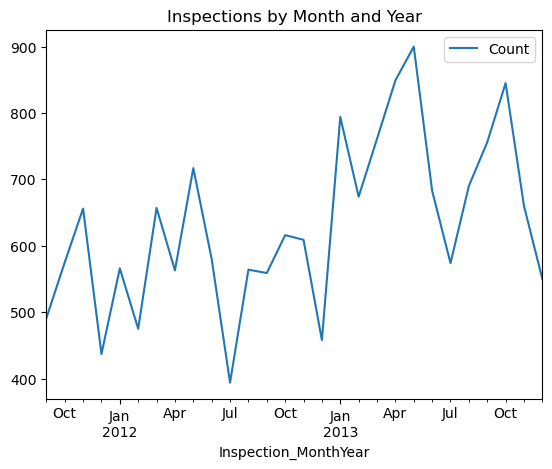

In [171]:
# visualize inspections over time
# -----------
chicago_inspections_2011_to_2013['Inspection_MonthYear'] = chicago_inspections_2011_to_2013['Inspection_Date'].dt.to_period('M')
counts_by_day = chicago_inspections_2011_to_2013.groupby('Inspection_MonthYear').count().rename(columns = {'Facility_Type': 'Count'})['Count'].reset_index()
counts_by_day.set_index(["Inspection_MonthYear"], inplace = True)
counts_by_day.plot(title = "Inspections by Month and Year") 

Let's visualize what the distribution of results looks like.

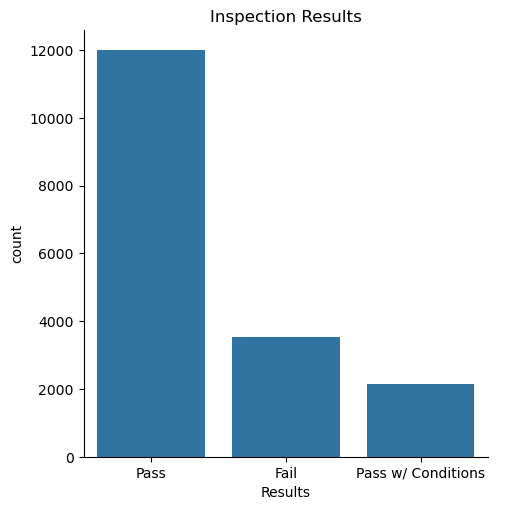

In [174]:
# view inspection results
# -----------
sns.catplot(data = chicago_inspections_2011_to_2013,
           x = "Results",
           kind = "count")

plt.title("Inspection Results")
plt.show()

What if we separate results by facility type?

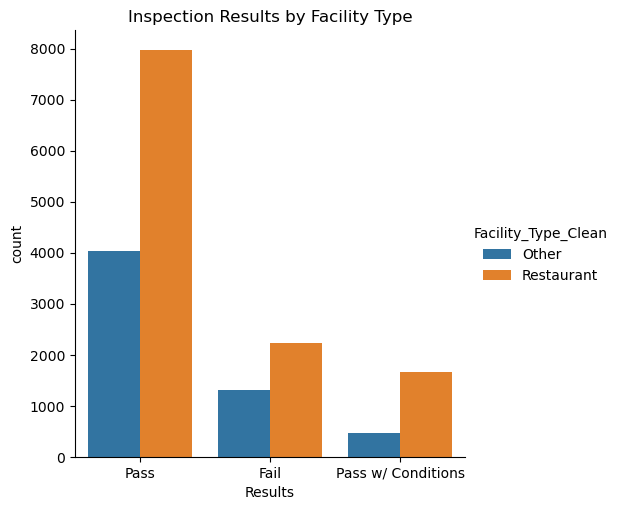

In [177]:
# view inspection results by facility type (restaurant or not)
# -----------
sns.catplot(data = chicago_inspections_2011_to_2013,
            x = "Results",
            kind = "count",
            hue = 'Facility_Type_Clean')

plt.title("Inspection Results by Facility Type")
plt.show();

## 2. Data Preprocessing and Cleaning

In [180]:
# drop datetime info
# -----------
chicago_inspections_2011_to_2013 = chicago_inspections_2011_to_2013.dropna().drop(['Inspection_Date',
                                                                                   'minDate',
                                                                                   'maxDate',
                                                                                   'Inspection_MonthYear'],
                                                                                  axis = 1)

In [182]:
# process target 
# -----------
y = chicago_inspections_2011_to_2013['Results']
y

Inspection_ID  DBA_Name                                
269961         SEVEN STAR                                                Pass
507211         PANERA BREAD                                              Pass
507212         LITTLE QUIAPO RESTAURANT                                  Fail
507216         SERGIO'S TAQUERIA PIZZA INC.                              Pass
507219         TARGET STORE # T-2079                                     Fail
                                                                  ...        
1393258        CIAO BELLA CAFE                                           Pass
1395218        Christian Fields Style  Bar                               Pass
1395224        W CHICAGO - LAKESHORE                       Pass w/ Conditions
1441493        ADVOCATE ILLINOIS MASONIC MEDICAL CENTER                  Pass
1493801        SODEXHO                                                   Pass
Name: Results, Length: 15311, dtype: object

I choose not to binarize the outcome variable because:    

**Imbalance Issue**  
In imbalanced datasets, classification models often tend to predict all inputs as the dominant class in order to minimize the loss function. In this dataset, the “Pass” class is already the dominant category. If we combine “Pass with Conditions” into the “Pass” category, the imbalance would become even more pronounced, which could significantly reduce the model’s performance. An overly imbalanced dataset might lead the model to overlook minority classes entirely. But the minority class "Fail" is especially important.  

**Policy implication**  
By keeping the class "Pass with Conditions" distinct, we preserve valuable information that can guide public management decisions. For instance, when resources are available, public policy authorities can use this classification to prioritize follow-up actions or allocate targeted resources more effectively.

In [185]:
# decide if you want to binarize the outcome variable 
# -----------
# comment out the following lines of code if you don't want to binarize the target variable
# y = y.replace({'Pass w/ Conditions': 'Pass'})
# lb_style = LabelBinarizer()
# y = lb_style.fit_transform(y)

# recode 0s and 1s so 1s are "Fail"
# y = np.where(y == 1, 0 ,1)

y = chicago_inspections_2011_to_2013['Results'].map({'Pass': 0, 'Fail': 1, 'Pass w/ Conditions': 2}).to_numpy()

# process features
# -----------

# create feature dataset
X = chicago_inspections_2011_to_2013.drop(columns = ['Results', 
                                                     'Facility_Type', 
                                                     'LICENSE_DESCRIPTION', 
                                                     'WARD_PRECINCT'])


# get dummies
X = pd.get_dummies(X)

In [187]:
# view feature datset
X.head()

,,criticalCount,seriousCount,minorCount,pastFail,pastCritical,pastSerious,pastMinor,timeSinceLast,firstRecord,POLICE_DISTRICT,ageAtInspection,consumption_on_premises_incidental_activity,tobacco,package_goods,outdoor_patio,public_place_of_amusement,limited_business_license,childrens_services_facility_license,tavern,regulated_business_license,filling_station,caterers_liquor_license,mobile_food_license,precipIntensity,temperatureMax,windSpeed,humidity,heat_burglary,heat_garbage,heat_sanitation,criticalFound,Risk_Risk 1 (High),Risk_Risk 2 (Medium),Risk_Risk 3 (Low),Inspection_Type_Canvass,Facility_Type_Clean_Other,Facility_Type_Clean_Restaurant,APPLICATION_TYPE_C_EXPA,APPLICATION_TYPE_C_LOC,APPLICATION_TYPE_ISSUE,APPLICATION_TYPE_RENEW
Inspection_ID,DBA_Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
269961,SEVEN STAR,0,0,2,0,0,0,0,2.0,1,19.0,10.964384,0,1,0,0,0,1,0,0,0,0,0,0,0.014587,53.496667,13.340000,0.900000,26.992376,12.768572,37.748787,0,False,False,True,True,True,False,False,False,False,True
507211,PANERA BREAD,0,0,3,0,0,0,0,2.0,1,24.0,7.457534,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,13.976557,12.895485,15.412267,0,True,False,False,True,False,True,False,False,False,True
507212,LITTLE QUIAPO RESTAURANT,0,2,6,0,0,0,0,2.0,1,17.0,4.578082,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,12.611239,8.004220,8.320330,0,True,False,False,True,False,True,False,False,False,True
507216,SERGIO'S TAQUERIA PIZZA INC.,0,0,6,0,0,0,0,2.0,1,17.0,7.805479,0,0,0,0,0,0,0,0,0,0,0,0,0.002737,56.153333,10.863333,0.616667,35.906383,26.238645,38.186618,0,True,False,False,True,False,True,False,False,False,True
507219,TARGET STORE # T-2079,0,2,6,0,0,0,0,2.0,1,24.0,5.290411,0,0,1,0,0,1,0,0,0,0,0,0,0.009987,52.730000,16.266667,0.690000,9.530785,3.401567,2.126788,0,False,True,False,True,False,True,False,False,False,True


## 3. Fit Models

Now choose 3 different machine learning techniques and apply them below. Choose from one of the algorithms we have used in lab (e.g., logistic regression, random forests, `AdaBoost()`, `xgboost()`, `VotingClassifer()`, or `BART`). 

Detail the basic logic and assumptions underlying each model, its pros/cons, and why it is a plausible choice for this problem. Also, be sure to do the following:

1. Import the appropriate library from sklearn
2. Set up a hyperparameter grid (check out our previous labs to see how to do this)
3. Find the best hyperparameters, and then fit your model (using either train/validation splits or cross-validation)

#### Data Splitting

In [37]:
np.random.seed(10)

X_train, X_validate, y_train, y_validate = train_test_split(X, 
                                                            y, 
                                                            train_size = .75, 
                                                            test_size = .25, 
                                                            stratify = y)

### Model 1: AdaBoost

Adaptive Boosting combines multiple weak classifiers to create a strong classifier. Adaptive Boosting sequentially train classifiers in a way that focuses on samples which are hard to classify. After each round of training, Adaboost assigns higher weights to misclassfied samples and lower weights to correctly classified samples. At the end, the predictions from all weak classifiers are combined through a weighted majority vote to produce the final output.

AdaBoost is easy to implement because it builds on weak learners, which are computationally efficient and easy to train. Adaboost is also well-suited for handling imbalanced datasets, as it emphasizes harder-to-classify minority class examples.

However, AdaBoost is sensitive to noise and outliers. If AdaBoost assign unnecessary high weights and overfit to those datapoints, generalization would be poor. Repeated, sequential training of weak learners and weight adjustments can be time-consuming for large datasets.

AdaBoost’s mechanism of reweighting samples ensures that minority classes, or samples that are harder to classify, receive more attention during training. This makes it **a good fit for datasets with imbalance**. “Pass with Conditions” proves to be often misclassified, and AdaBoost naturally **direct more effort toward improving the classification of this category**.

#### Create Model

In [267]:
base_estimator = DecisionTreeClassifier()

ada_classifier = AdaBoostClassifier(estimator = base_estimator)

ada_classifier.fit(X_train, y_train)

y_pred = ada_classifier.predict(X_validate)
print(classification_report( y_validate, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2565
           1       0.77      0.75      0.76       772
           2       0.64      0.66      0.65       491

    accuracy                           0.90      3828
   macro avg       0.80      0.80      0.80      3828
weighted avg       0.90      0.90      0.90      3828



#### Hyperparameter Tuning

In [46]:
!pip install optuna

In [47]:
import optuna
optuna.logging.set_verbosity(optuna.logging.ERROR)

In [48]:
skf = StratifiedKFold(n_splits=5)

In [49]:
def ada_objective(trial):
    n_estimators = trial.suggest_categorical('n_estimators', [50, 100, 200, 300])
    learning_rate = trial.suggest_categorical('learning_rate', [0.001, 0.01, 0.05, 0.1, 0.5, 1.0])
    
    base_estimator_option = trial.suggest_categorical('estimator', [
        'depth_1',
        'depth_2_split_5',
        'depth_3_split_10_leaf_4'
    ])
    
    if base_estimator_option == 'depth_1':
        estimator = DecisionTreeClassifier(max_depth=1)
    elif base_estimator_option == 'depth_2_split_5':
        estimator = DecisionTreeClassifier(max_depth=2, min_samples_split=5)
    elif base_estimator_option == 'depth_3_split_10_leaf_4':
        estimator = DecisionTreeClassifier(max_depth=3, min_samples_split=10, min_samples_leaf=4)
    
    model = AdaBoostClassifier(
        n_estimators=n_estimators,
        learning_rate=learning_rate,
        estimator=estimator
    )
    
    score = cross_val_score(model, X_train, y_train, cv=skf, scoring='f1_macro').mean()
    return score

In [50]:
ada_study = optuna.create_study(direction='maximize')
ada_study.optimize(ada_objective, n_trials=50)
print("Best AdaBoost Parameters:")
print(ada_study.best_trial.params)

Best AdaBoost Parameters:
{'n_estimators': 50, 'learning_rate': 0.01, 'estimator': 'depth_3_split_10_leaf_4'}


In [265]:
best_params = ada_study.best_trial.params

if best_params['estimator'] == 'depth_1':
    estimator = DecisionTreeClassifier(max_depth=1)
elif best_params['estimator'] == 'depth_2_split_5':
    estimator = DecisionTreeClassifier(max_depth=2, min_samples_split=5)
elif best_params['estimator'] == 'depth_3_split_10_leaf_4':
    estimator = DecisionTreeClassifier(max_depth=3, min_samples_split=10, min_samples_leaf=4)

ada_best = AdaBoostClassifier(
    n_estimators=best_params['n_estimators'],
    learning_rate=best_params['learning_rate'],
    estimator=estimator
)

ada_best.fit(X_train, y_train)
ada_best_pred = ada_best.predict(X_validate)
print(classification_report(y_validate,ada_best_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2565
           1       0.74      0.95      0.83       772
           2       0.93      0.49      0.64       491

    accuracy                           0.92      3828
   macro avg       0.89      0.81      0.82      3828
weighted avg       0.93      0.92      0.92      3828



###  Model 2: Random Forest

Random forests use several decision trees, with each tree built on different subsets of the training data, a process known as bagging. Correlation between trees is reduced by feature bagging (choosing a random subset of features with replacement) at each decision split. The final prediction in random forests comes from averaging the output of the decision trees (in regression) or taking the majority vote (in classification).

Random Forest can handle datasets with many features and does not require extensive feature selection or dimensionality reduction. Since each tree is trained on a random subset of features, features that are highly predictive will naturally be selected more frequently and contribute significantly to the ensemble’s output.The combination of bagging and feature randomness reduces the risk of overfitting compared to single decision trees, especially on large datasets.

While Random Forest provides feature importance scores, the overall model is less interpretable compared to simpler models. For datasets with sparse features (e.g., text or high-dimensional categorical data), Random Forest may not perform as well as specialized models like gradient boosting or linear classifiers.

Random Forest is robust to noise and outliers because predictions are based on the consensus of multiple trees, which **reduces the influence of individual noisy cases** in this dataset. **Features that are highly correlated with the inspection result** are effectively leveraged in Random Forest, making it a good choice if certain predictors have a strong impact on the inspection outcome.

In [269]:
rf_classifier = RandomForestClassifier(n_estimators = 100,
                                      criterion = 'gini',
                                      max_depth = None,
                                      min_samples_split = 2,
                                      min_samples_leaf = 1,
                                      min_weight_fraction_leaf = 0.0,
                                      max_features = 'sqrt',
                                      max_leaf_nodes = None,
                                      min_impurity_decrease = 10e-7,
                                      class_weight='balanced')

rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_validate)

print(classification_report( y_validate, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2565
           1       0.76      0.93      0.83       772
           2       0.86      0.54      0.67       491

    accuracy                           0.92      3828
   macro avg       0.87      0.82      0.83      3828
weighted avg       0.93      0.92      0.92      3828



#### Hyperparameter Tuning

In [56]:
def rf_objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 100, 500)
    max_depth = trial.suggest_categorical('max_depth', [5, 10, 15, 20, None])
    min_samples_split = trial.suggest_int('min_samples_split', 2, 11)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 2, 11)
    max_features = trial.suggest_categorical('max_features', ['sqrt','log2'])
    class_weight = trial.suggest_categorical('class_weight',['balanced',{0: 1, 1: 1, 2: 2}, {0: 1, 1: 1, 2: 5}])
    
    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf = min_samples_leaf,
        max_features = max_features,
        class_weight = class_weight)
    score = cross_val_score(model, X_train, y_train, cv=skf, scoring="f1_macro").mean()
    return score

In [57]:
rf_study = optuna.create_study(direction="maximize")
rf_study.optimize(rf_objective, n_trials=50)
print("Best Random Forest Parameters:")
print(rf_study.best_trial.params)

Best Random Forest Parameters:
{'n_estimators': 500, 'max_depth': 10, 'min_samples_split': 8, 'min_samples_leaf': 9, 'max_features': 'sqrt', 'class_weight': {0: 1, 1: 1, 2: 2}}


In [271]:
best_params = rf_study.best_trial.params

rf_best = RandomForestClassifier(n_estimators = best_params['n_estimators'],
                                 max_depth = best_params['max_depth'],
                                      min_samples_split = best_params['min_samples_split'],
                                      min_samples_leaf = best_params['min_samples_leaf'],
                                      max_features = best_params['max_features'],
                                      class_weight = best_params['class_weight'])
rf_best.fit(X_train, y_train)
rf_best_pred = rf_best.predict(X_validate)
print(classification_report( y_validate,rf_best_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2565
           1       0.78      0.82      0.80       772
           2       0.73      0.65      0.68       491

    accuracy                           0.92      3828
   macro avg       0.83      0.82      0.83      3828
weighted avg       0.91      0.92      0.91      3828



### Model 3：XGBoost

XGBoost focuses on learning from errors. It builds decision trees sequentially, where each new tree predicts the residuals of the previous one. The new model’s predictions are adjusted based on the previous model’s results plus the weighted residuals, with hyperparameters like learning rate adjusting the impact of these residual predictions. Unlike random forests, all decision trees in XGBoost use the same features, but later trees focus on capturing smaller patterns missed in earlier models. 

XGBoost is known for its superior predictive accuracy across many use cases, often outperforming other algorithms. XGBoost also incorporates regularization to prevent overfitting, which isn’t mentioned but is a critical distinction from random forests. XGBoost supports parallel processing and distributed computing, making it scalable to large datasets.

Similar to Random Forest, the sequential and complex nature of XGBoost makes it harder to interpret compared to simpler models.

XGBoost is a powerful model to give accurate predict on inspections results. The built-in regularization prevent overfitting in noisy datasets with large number of features.

In [273]:
class_weights = compute_class_weight(class_weight='balanced',
                                     classes=np.unique(y_train),
                                     y= y_train)

class_weight_dict = {i: class_weights[i] for i in range(len(class_weights))}


xgb_classifier = xgb.XGBClassifier(objective='multi:softmax',
                                   num_class=3,
                                   random_state=10,
                                   class_weight=class_weight_dict)

xgb_classifier.fit(X_train, y_train)

y_pred = xgb_classifier.predict(X_validate)

print(classification_report(y_validate, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      2565
           1       0.78      0.88      0.83       772
           2       0.77      0.61      0.68       491

    accuracy                           0.92      3828
   macro avg       0.85      0.83      0.84      3828
weighted avg       0.92      0.92      0.92      3828



#### Hyperparameter Tuning

In [67]:
def xgb_objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 100, 1000)
    max_depth = trial.suggest_int('max_depth', 3, 10)
    learning_rate = trial.suggest_float('learning_rate', 0.01, 1.0, log = True)
    colsample_bytree = trial.suggest_float('colsample_bytree', 0.5, 1.0)
    min_child_weight = trial.suggest_categorical('min_child_weight',[1, 3, 5, 10, 15])
    gamma = trial.suggest_float('gamma', 0.0, 1.0)
    reg_lambda = trial.suggest_float('lambda', 0.0, 10.0)
    alpha = trial.suggest_float('alpha',0.0, 10.0)

    model = xgb.XGBClassifier(n_estimators = n_estimators,
                          max_depth = max_depth,
                          learning_rate = learning_rate,
                          colsample_bytree = colsample_bytree,
                          min_child_weight = min_child_weight,
                          gamma = gamma,
                          reg_lambda = reg_lambda,
                          reg_alpha = alpha
                         )
    score = cross_val_score(model, X_train, y_train, cv=skf, scoring='f1_macro').mean()
    return score

In [68]:
xgb_study = optuna.create_study(direction="maximize")
xgb_study.optimize(xgb_objective, n_trials=50)
print("Best XGBoost Parameters:")
print(xgb_study.best_trial.params)

Best XGBoost Parameters:
{'n_estimators': 943, 'max_depth': 8, 'learning_rate': 0.3428136764327424, 'colsample_bytree': 0.9213998400555204, 'min_child_weight': 3, 'gamma': 0.404506543817538, 'lambda': 5.973695119452641, 'alpha': 2.823207128984654}


In [277]:
best_params = xgb_study.best_trial.params

xgb_best = xgb.XGBClassifier(n_estimators = best_params['n_estimators'],
                          max_depth = best_params['max_depth'],
                          learning_rate = best_params['learning_rate'],
                          colsample_bytree = best_params['colsample_bytree'],
                          min_child_weight = best_params['min_child_weight'],
                          gamma = best_params['gamma'],
                          reg_lambda = best_params['lambda'],
                          reg_alpha = best_params['alpha']
                         )
xgb_best.fit(X_train, y_train)
xgb_best_pred = xgb_best.predict(X_validate)
print(classification_report(y_validate, xgb_best_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2565
           1       0.77      0.91      0.83       772
           2       0.82      0.59      0.68       491

    accuracy                           0.92      3828
   macro avg       0.86      0.83      0.84      3828
weighted avg       0.93      0.92      0.92      3828



### Validation Metrics

Be sure to explain which of these metrics you would want to prioritize when conducting predictive auditing in this context and why.

**Hint**: Try writing a for loop to use [`cross_val_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) to check for accuracy, precision, recall and f1 across all of your models.

In [72]:
def evaluate_models(model_names, model_instances, X_train, y_train, X_validate, y_validate):
    results = []
    class_names = ["Pass", "Fail", "Pass w/ Conditions"] 
    for model_name, model_instance in zip(model_names, model_instances):
        
        model_instance.fit(X_train, y_train)
        y_pred = model_instance.predict(X_validate)
        
        accuracy = accuracy_score(y_validate, y_pred)
        precision = precision_score(y_validate, y_pred, average='macro')
        recall = recall_score(y_validate, y_pred, average='macro')
        f1 = f1_score(y_validate, y_pred, average='macro')
        
        report = classification_report(y_validate, y_pred, target_names=class_names, output_dict=True)
        
        model_result = {
            "Model": model_name,
            "Accuracy": accuracy,
            "Macro Precision": precision,
            "Macro Recall": recall,
            "Macro F1 Score": f1}
        
        for class_name in class_names:
            model_result[f"{class_name} Precision"] = report[class_name]['precision']
            model_result[f"{class_name} Recall"] = report[class_name]['recall']
            model_result[f"{class_name} F1 Score"] = report[class_name]['f1-score']
        
        results.append(model_result)
        
        cm = confusion_matrix(y_validate, y_pred)
        print(f"\nConfusion Matrix for {model_name}:\n")
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
        disp.plot(cmap='viridis')
        plt.title(f"Confusion Matrix: {model_name}")
        plt.show()
    
    results_df = pd.DataFrame(results)
    return results_df


Confusion Matrix for AdaBoost:



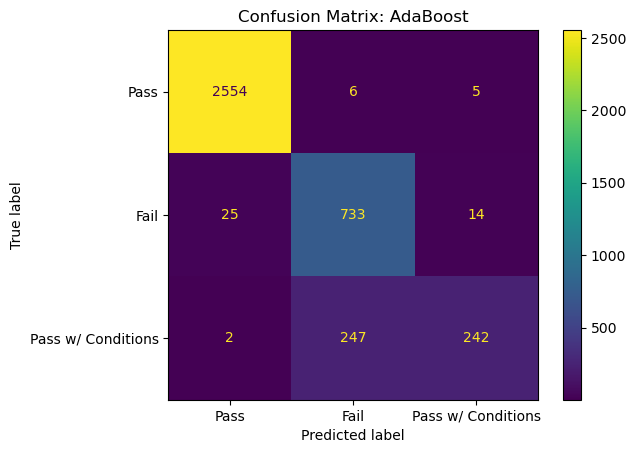


Confusion Matrix for Random Forest:



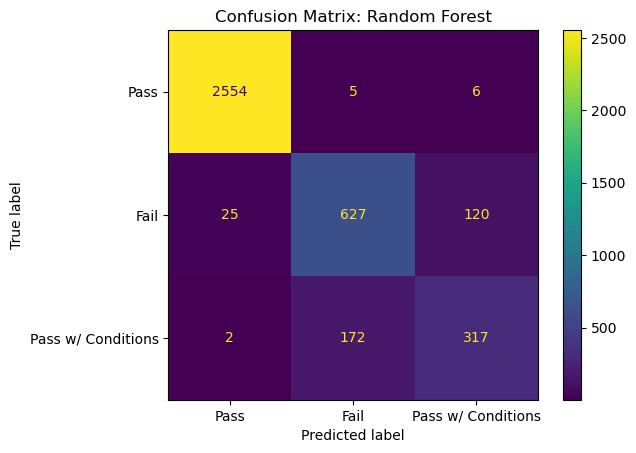


Confusion Matrix for XGBoost:



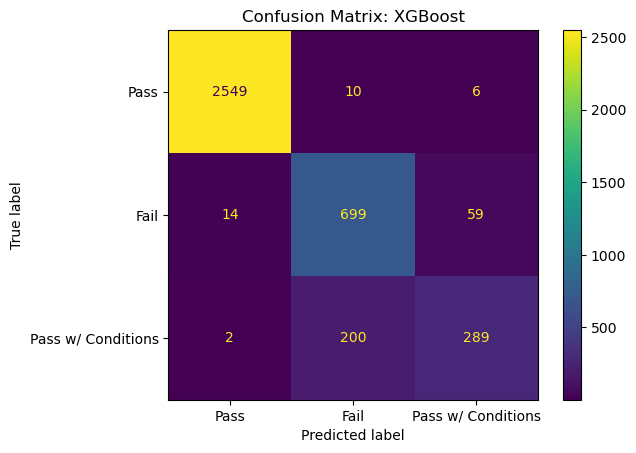

,Model,Accuracy,Macro Precision,Macro Recall,Macro F1 Score,Pass Precision,Pass Recall,Pass F1 Score,Fail Precision,Fail Recall,Fail F1 Score,Pass w/ Conditions Precision,Pass w/ Conditions Recall,Pass w/ Conditions F1 Score
0,AdaBoost,0.921891,0.886717,0.812688,0.823378,0.989539,0.995712,0.992616,0.743408,0.949482,0.833902,0.927203,0.492872,0.643617
1,Random Forest,0.913793,0.828322,0.817836,0.822367,0.989539,0.995712,0.992616,0.779851,0.812176,0.795685,0.715576,0.645621,0.678801
2,XGBoost,0.923981,0.859708,0.829266,0.836478,0.993762,0.993762,0.993762,0.768977,0.905440,0.831648,0.816384,0.588595,0.684024


In [73]:
model_name = [ 'AdaBoost', 
               'Random Forest',
               'XGBoost']
model_instance = [ ada_best,
                   rf_best,
                   xgb_best]

results_df = evaluate_models(model_name, model_instance, X_train, y_train, X_validate, y_validate)
results_df

### Model Selection  

In general, the three models give a good prediction on the "Pass" class but struggle with the "Pass with Conditions" class.

AdaBoost achieves the highest “Fail” recall, ensuring it identifies the most failed inspections. However, its “Pass with Conditions” recall is relatively low.  
Random Forest performs best on predicting "Pass with Conditions" at the cost of a lower "Fail" recall.
XGBoost has strong overall performace but falls slightly behind AdaBoost in "Fail" recall.

Based on the policy emphasis on **minimizing false negatives in the “Fail” class**, **AdaBoost** would be the most suitable model to interpret feature importance.

## 4. Policy Simulation

### Interpretable Machine Learning

Use tools like coefficient plots or feature importance plots to investigate your models. Which features contribute to your predictions? Are there any additional features you wish you could incorporate that you don't have available in this analysis?

**Hint**: Use tools like feature importance plots and coefficient plots.

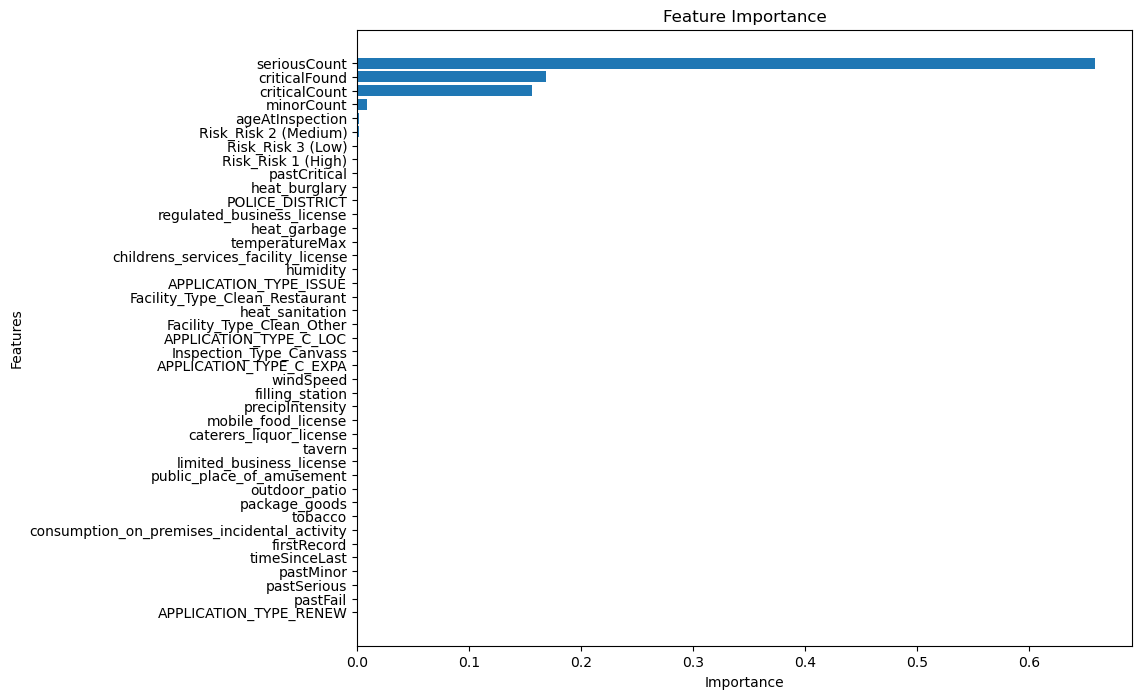

In [315]:
importance = ada_best.feature_importances_

feature_names = X.columns

df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 8))
plt.barh(df['Feature'], df['Importance'])
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.gca().invert_yaxis() 
plt.show()

In [309]:
top_10_features = df.head(10)
print(top_10_features)

                 Feature  Importance
1           seriousCount    0.658750
30         criticalFound    0.168848
0          criticalCount    0.156167
2             minorCount    0.009042
10       ageAtInspection    0.002010
32  Risk_Risk 2 (Medium)    0.001925
33     Risk_Risk 3 (Low)    0.000922
31    Risk_Risk 1 (High)    0.000865
4           pastCritical    0.000408
27         heat_burglary    0.000349


**Interpretation**  
Since multi-class classifiers provide global feature importance, their interpretability for feature importance is relatively low. However, it is reasonable to infer that historical records relating to food securitys reflect the overall food safety status of an establishment, which could influence inspection outcomes.

Providing more **details about an establishment’s operations** could potentially improve prediction accuracy. For instance, information about staff qualifications or training in safety protocols might help identify establishments more likely to comply with regulations and ensure food safety.

The **timing of inspections** might also be significant. While current features include meteorological conditions, time could have other impacts. For example, spring and winter may have similar environmental conditions, but winter is a holiday season when establishments are busier. Additionally, since this is time-series data, failing to account for the timing of inspections during encoding could result in missing patterns that vary over time.

### Prioritize Audits

**Hint**: Look up the [`.predict()`](https://www.kite.com/python/docs/sklearn.linear_model.SGDRegressor.predict), [`.predict_proba()`](https://www.kite.com/python/docs/sklearn.linear_model.LogisticRegression.predict_proba), and [`.sample()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html) methods. Then: 
1. Choose one of your models (or train a new simplified model or ensemble!) to predict outcomes and probabilities. 
2. Order your audits by their probability of detecting a "Fail" score
3. Plot your distribution of pass/fail among the first 1,000 observations in the dataset
4. Simulate random audits on the full chicago_2011_to_2013.csv dataset by picking 1,000 observations at random

#### Model Refinement

In [83]:
#
# 1. Choose one of your models (or train a new simplified model or ensemble!) to predict outcomes and probabilities.
# -----------

Considering that the three models exhibit varying strengths and weaknesses in predicting different classes, an ensemble approach might provide a more robust and accurate model.

**Ensemble**

In [117]:
voting_clf1 = VotingClassifier(estimators = [('ada', ada_best),
                                           ('rf', rf_best),
                                           ('xgb',xgb_best)],
                              voting = 'soft')

voting_clf1.fit(X_train, y_train)
y_pred = voting_clf1.predict(X_validate)


Confusion Matrix for Voting Classifier (Soft Voting) of all 3 models:



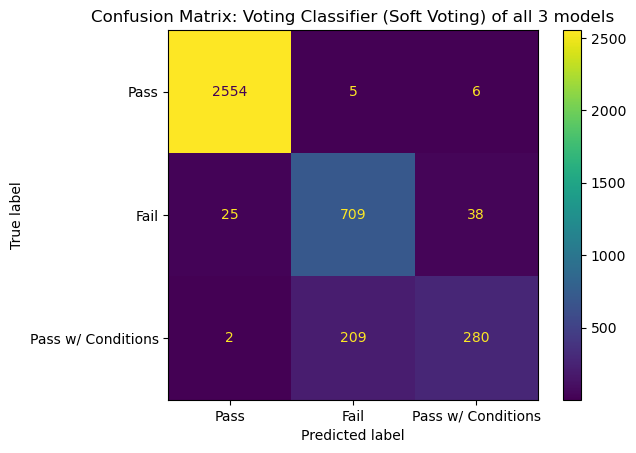

,Model,Accuracy,Macro Precision,Macro Recall,Macro F1 Score,Pass Precision,Pass Recall,Pass F1 Score,Fail Precision,Fail Recall,Fail F1 Score,Pass w/ Conditions Precision,Pass w/ Conditions Recall,Pass w/ Conditions F1 Score
0,Voting Classifier (Soft Voting) of all 3 models,0.925549,0.873961,0.828123,0.83877,0.989539,0.995712,0.992616,0.768147,0.918394,0.836578,0.864198,0.570265,0.687117


In [281]:
model_name = [ 'Voting Classifier (Soft Voting) of all 3 models' ]
model_instance = [voting_clf1]

results_df = evaluate_models(model_name, model_instance, X_train, y_train, X_validate, y_validate)
results_df

In [134]:
voting_clf2 = VotingClassifier(estimators = [('ada', ada_best),
                                           ('rf', rf_best),
                                           ('xgb',xgb_best)],
                              voting = 'hard',
                              weights=[1, 1, 5])

voting_clf2.fit(X_train, y_train)
y_pred = voting_clf2.predict(X_validate)


Confusion Matrix for Voting Classifier (Hard Voting) of all 3 models:



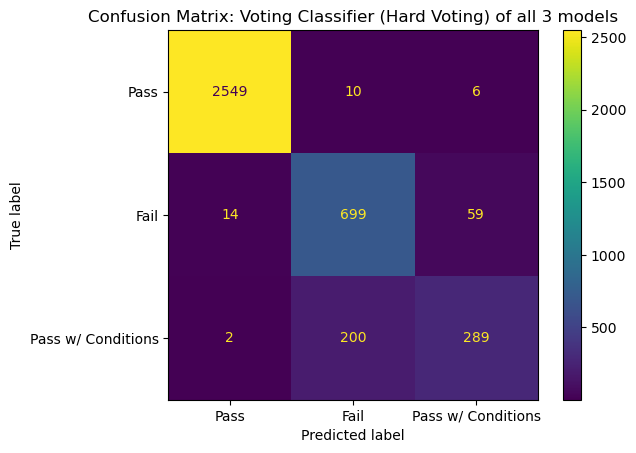

,Model,Accuracy,Macro Precision,Macro Recall,Macro F1 Score,Pass Precision,Pass Recall,Pass F1 Score,Fail Precision,Fail Recall,Fail F1 Score,Pass w/ Conditions Precision,Pass w/ Conditions Recall,Pass w/ Conditions F1 Score
0,Voting Classifier (Hard Voting) of all 3 models,0.923981,0.859708,0.829266,0.836478,0.993762,0.993762,0.993762,0.768977,0.90544,0.831648,0.816384,0.588595,0.684024


In [279]:
model_name = [ 'Voting Classifier (Hard Voting) of all 3 models' ]
model_instance = [voting_clf2]

results_df = evaluate_models(model_name, model_instance, X_train, y_train, X_validate, y_validate)
results_df

In [136]:
stacking_clf = StackingClassifier(
    estimators=[('ada', ada_best), ('rf', rf_best), ('xgb', xgb_best)],
    final_estimator=LogisticRegression(class_weight='balanced') 
)
stacking_clf.fit(X_train, y_train)
y_pred = stacking_clf.predict(X_validate)


Confusion Matrix for Stacking Classifier of all 3 models:



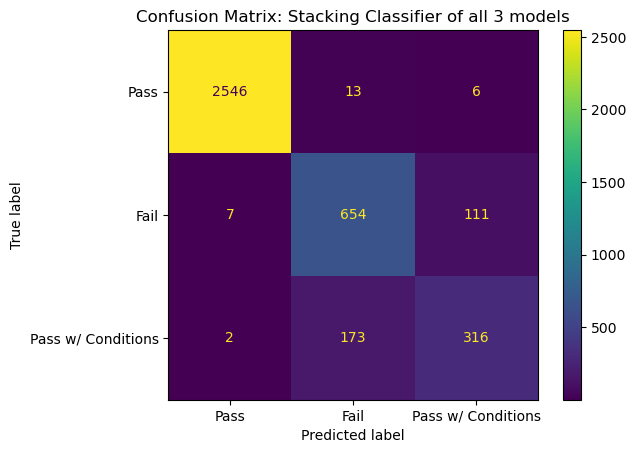

,Model,Accuracy,Macro Precision,Macro Recall,Macro F1 Score,Pass Precision,Pass Recall,Pass F1 Score,Fail Precision,Fail Recall,Fail F1 Score,Pass w/ Conditions Precision,Pass w/ Conditions Recall,Pass w/ Conditions F1 Score
0,Stacking Classifier of all 3 models,0.918495,0.834947,0.827776,0.829976,0.996477,0.992593,0.994531,0.778571,0.84715,0.811414,0.729792,0.643585,0.683983


In [283]:
model_name = [ 'Stacking Classifier of all 3 models' ]
model_instance = [stacking_clf]

results_df = evaluate_models(model_name, model_instance, X_train, y_train, X_validate, y_validate)
results_df

In [257]:
best_model = voting_clf1

In [190]:
#
# 2. Order your audits by their probability of detecting a "Fail" score
# -----------


In [192]:
X_for_prediction = X.copy()
predictions = xgb_best.predict_proba(X_for_prediction) 

X_sorted = X.copy()
X_sorted['prob_fail'] = predictions[:, 1]
X_sorted = X_sorted.sort_values(by='prob_fail', ascending=False)

X_sorted.head(10)

,,criticalCount,seriousCount,minorCount,pastFail,pastCritical,pastSerious,pastMinor,timeSinceLast,firstRecord,POLICE_DISTRICT,ageAtInspection,consumption_on_premises_incidental_activity,tobacco,package_goods,outdoor_patio,public_place_of_amusement,limited_business_license,childrens_services_facility_license,tavern,regulated_business_license,filling_station,caterers_liquor_license,mobile_food_license,precipIntensity,temperatureMax,windSpeed,humidity,heat_burglary,heat_garbage,heat_sanitation,criticalFound,Risk_Risk 1 (High),Risk_Risk 2 (Medium),Risk_Risk 3 (Low),Inspection_Type_Canvass,Facility_Type_Clean_Other,Facility_Type_Clean_Restaurant,APPLICATION_TYPE_C_EXPA,APPLICATION_TYPE_C_LOC,APPLICATION_TYPE_ISSUE,APPLICATION_TYPE_RENEW,prob_fail
Inspection_ID,DBA_Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1285664,CAFE COLAO,1,3,3,0,0,0,0,2.000000,1,14.0,5.830137,0,0,0,0,0,0,0,0,0,0,0,0,0.000233,64.163333,9.613333,0.650000,33.868553,17.436415,34.300683,1,True,False,False,True,True,False,False,False,False,True,0.988506
1174411,NEW STOP FOOD & TOBACCO,1,2,5,0,0,0,0,2.000000,1,11.0,2.926027,0,0,0,0,0,0,0,0,0,0,0,0,0.002090,61.650000,15.026667,0.553333,24.143465,39.130934,65.744437,1,False,False,True,True,True,False,False,False,False,True,0.983124
1174311,"LA NUEVA IMAGEN GROCERY, INC.",0,4,8,0,0,0,0,2.000000,1,10.0,4.712329,0,1,0,0,0,1,0,0,0,0,0,0,0.000233,81.086667,8.800000,0.616667,19.632207,32.424804,10.594237,0,True,False,False,True,True,False,False,False,False,True,0.983079
1214463,PHIL STEFANI SIGNATURE EVENTS,2,3,8,0,0,0,0,2.000000,1,12.0,7.736986,0,0,0,0,0,0,0,0,0,0,0,0,0.000933,55.760000,10.626667,0.573333,8.790054,13.505946,15.332475,1,True,False,False,True,False,True,False,False,False,True,0.982127
1285691,"JESUS & PETRA ARANDA, INC",1,2,7,0,0,0,4,0.841096,0,9.0,10.638356,0,0,0,0,0,0,0,0,0,0,0,0,0.001707,64.803333,8.523333,0.703333,25.719070,25.975951,12.985155,1,True,False,False,True,True,False,False,False,False,True,0.981868
1227519,ONESTI PIZZA INC,2,3,6,0,0,0,0,2.000000,1,8.0,10.786301,0,0,0,0,0,0,0,0,0,0,0,0,0.017333,85.460000,9.113333,0.553333,27.031388,37.086428,17.202684,1,True,False,False,True,False,True,False,False,False,True,0.981675
1150845,SUFWAN LAUNDRIES,1,2,5,0,0,0,0,2.000000,1,7.0,0.964384,0,1,0,0,0,0,0,0,1,0,0,0,0.005373,65.020000,13.663333,0.716667,56.573144,41.303229,58.091084,1,False,True,False,True,True,False,False,False,False,True,0.981461
1369844,NEW CHINA BUFFET ENTERPRISES,1,4,4,0,0,0,6,0.723288,0,16.0,3.432877,0,0,0,0,0,0,0,0,0,0,0,0,0.000267,55.230000,9.076667,0.690000,0.255780,9.459343,3.800943,1,True,False,False,True,False,True,False,False,False,True,0.981295
1361320,SALERNO'S,3,3,10,0,0,0,6,1.449315,0,12.0,11.328767,0,0,0,0,0,0,0,0,0,0,0,0,0.000047,86.473333,10.213333,0.680000,25.564014,6.065070,31.379527,1,True,False,False,True,False,True,False,False,False,True,0.981184


In [194]:
#
# 3. Plot your distribution of pass/fail among the first 1,000 observations in the dataset
# -----------


In [212]:
y_reindex = pd.Series(y, index=X.index, name='Results').reindex(X_sorted.index)
y_reindex.head()

Inspection_ID  DBA_Name                     
1285664        CAFE COLAO                       1
1174411        NEW STOP FOOD & TOBACCO          1
1174311        LA NUEVA IMAGEN GROCERY, INC.    1
1214463        PHIL STEFANI SIGNATURE EVENTS    1
1285691        JESUS & PETRA ARANDA, INC        1
Name: Results, dtype: int64

In [214]:
combined_data = pd.concat([X_sorted, y_reindex], axis=1)

In [220]:
first_1000 = combined_data.head(1000)
first_1000.head()

,,criticalCount,seriousCount,minorCount,pastFail,pastCritical,pastSerious,pastMinor,timeSinceLast,firstRecord,POLICE_DISTRICT,ageAtInspection,consumption_on_premises_incidental_activity,tobacco,package_goods,outdoor_patio,public_place_of_amusement,limited_business_license,childrens_services_facility_license,tavern,regulated_business_license,filling_station,caterers_liquor_license,mobile_food_license,precipIntensity,temperatureMax,windSpeed,humidity,heat_burglary,heat_garbage,heat_sanitation,criticalFound,Risk_Risk 1 (High),Risk_Risk 2 (Medium),Risk_Risk 3 (Low),Inspection_Type_Canvass,Facility_Type_Clean_Other,Facility_Type_Clean_Restaurant,APPLICATION_TYPE_C_EXPA,APPLICATION_TYPE_C_LOC,APPLICATION_TYPE_ISSUE,APPLICATION_TYPE_RENEW,prob_fail,Results
Inspection_ID,DBA_Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1285664,CAFE COLAO,1,3,3,0,0,0,0,2.000000,1,14.0,5.830137,0,0,0,0,0,0,0,0,0,0,0,0,0.000233,64.163333,9.613333,0.650000,33.868553,17.436415,34.300683,1,True,False,False,True,True,False,False,False,False,True,0.988506,1
1174411,NEW STOP FOOD & TOBACCO,1,2,5,0,0,0,0,2.000000,1,11.0,2.926027,0,0,0,0,0,0,0,0,0,0,0,0,0.002090,61.650000,15.026667,0.553333,24.143465,39.130934,65.744437,1,False,False,True,True,True,False,False,False,False,True,0.983124,1
1174311,"LA NUEVA IMAGEN GROCERY, INC.",0,4,8,0,0,0,0,2.000000,1,10.0,4.712329,0,1,0,0,0,1,0,0,0,0,0,0,0.000233,81.086667,8.800000,0.616667,19.632207,32.424804,10.594237,0,True,False,False,True,True,False,False,False,False,True,0.983079,1
1214463,PHIL STEFANI SIGNATURE EVENTS,2,3,8,0,0,0,0,2.000000,1,12.0,7.736986,0,0,0,0,0,0,0,0,0,0,0,0,0.000933,55.760000,10.626667,0.573333,8.790054,13.505946,15.332475,1,True,False,False,True,False,True,False,False,False,True,0.982127,1
1285691,"JESUS & PETRA ARANDA, INC",1,2,7,0,0,0,4,0.841096,0,9.0,10.638356,0,0,0,0,0,0,0,0,0,0,0,0,0.001707,64.803333,8.523333,0.703333,25.719070,25.975951,12.985155,1,True,False,False,True,True,False,False,False,False,True,0.981868,1


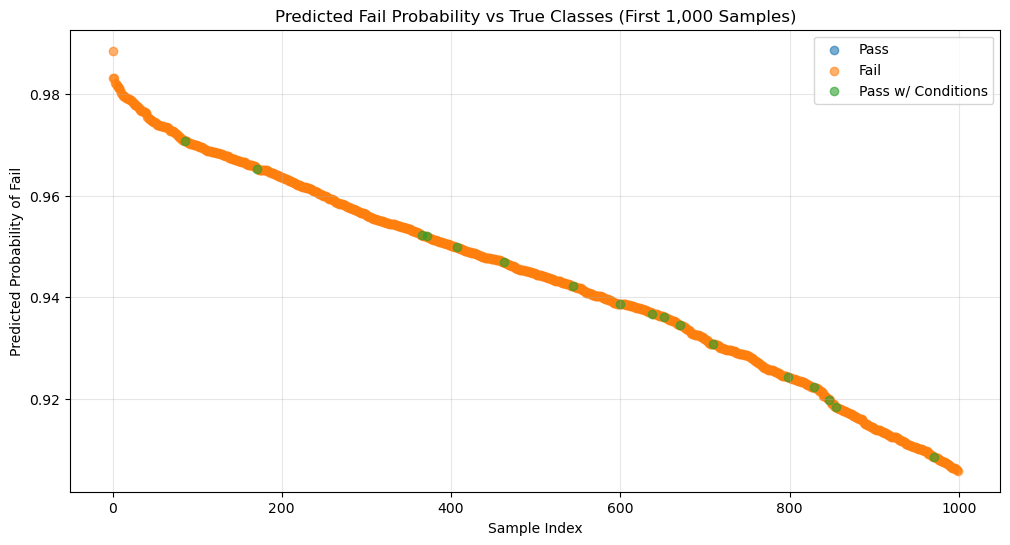

In [238]:
first_1000 = first_1000.reset_index()

color_map = {0: 'blue', 1: 'red', 2: 'green'}
labels = ['Pass', 'Fail', 'Pass w/ Conditions']

plt.figure(figsize=(12, 6))


for label in [0, 1, 2]:
    subset = first_1000[first_1000['Results'] == label]  
    plt.scatter(
        subset.index,                      
        subset['prob_fail'],             
        label=f"{labels[label]}",       
        alpha=0.6                         
    )


plt.title("Predicted Fail Probability vs True Classes (First 1,000 Samples)")
plt.xlabel("Sample Index")
plt.ylabel("Predicted Probability of Fail")
plt.legend() 
plt.grid(True, alpha=0.3)
plt.show()

In [240]:
#
# 4. Simulate random audits on the full chicago_2011_to_2013.csv dataset by picking 1,000 observations at random
# -----------


In [242]:
random_1000 = combined_data.sample(1000)
random_1000.head()

,,criticalCount,seriousCount,minorCount,pastFail,pastCritical,pastSerious,pastMinor,timeSinceLast,firstRecord,POLICE_DISTRICT,ageAtInspection,consumption_on_premises_incidental_activity,tobacco,package_goods,outdoor_patio,public_place_of_amusement,limited_business_license,childrens_services_facility_license,tavern,regulated_business_license,filling_station,caterers_liquor_license,mobile_food_license,precipIntensity,temperatureMax,windSpeed,humidity,heat_burglary,heat_garbage,heat_sanitation,criticalFound,Risk_Risk 1 (High),Risk_Risk 2 (Medium),Risk_Risk 3 (Low),Inspection_Type_Canvass,Facility_Type_Clean_Other,Facility_Type_Clean_Restaurant,APPLICATION_TYPE_C_EXPA,APPLICATION_TYPE_C_LOC,APPLICATION_TYPE_ISSUE,APPLICATION_TYPE_RENEW,prob_fail,Results
Inspection_ID,DBA_Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1098606,THREE R FOOD,2,1,9,0,0,0,0,2.000000,1,17.0,3.421918,0,0,0,0,0,0,0,0,0,0,0,0,0.002273,70.686667,12.750000,0.576667,9.567473,7.813093,14.281427,1,True,False,False,True,True,False,False,False,False,True,0.922574,1
1118210,COCULA RESTAURANT,0,0,3,0,0,0,0,2.000000,1,4.0,9.854795,1,0,0,0,0,0,0,0,0,0,0,0,0.000143,79.883333,11.676667,0.570000,42.524682,15.156408,27.465808,0,True,False,False,True,False,True,False,False,False,True,0.001449,0
1326730,ANDIES RESTAURANT,0,0,3,0,0,0,7,0.964384,0,20.0,10.893151,1,0,0,0,0,0,0,0,0,0,0,0,0.000000,41.446667,10.126667,0.436667,26.101714,10.352225,11.515340,0,True,False,False,True,False,True,False,False,False,True,0.001755,0
664318,STARBUCKS COFFEE #11751,0,0,2,0,0,0,0,2.000000,1,24.0,4.572603,0,0,0,0,0,1,0,0,0,0,0,0,0.000000,40.453333,11.263333,0.590000,4.187384,19.125799,16.612405,0,False,True,False,True,False,True,False,False,False,True,0.001708,0
1194295,LE FLOUR BAKE SHOP & MARKET INC.,0,0,0,0,0,0,0,2.000000,1,16.0,3.413699,0,0,0,0,0,0,0,0,0,0,0,0,0.000593,83.743333,10.473333,0.420000,0.458761,20.032427,3.003878,0,True,False,False,True,True,False,False,False,False,True,0.482459,1


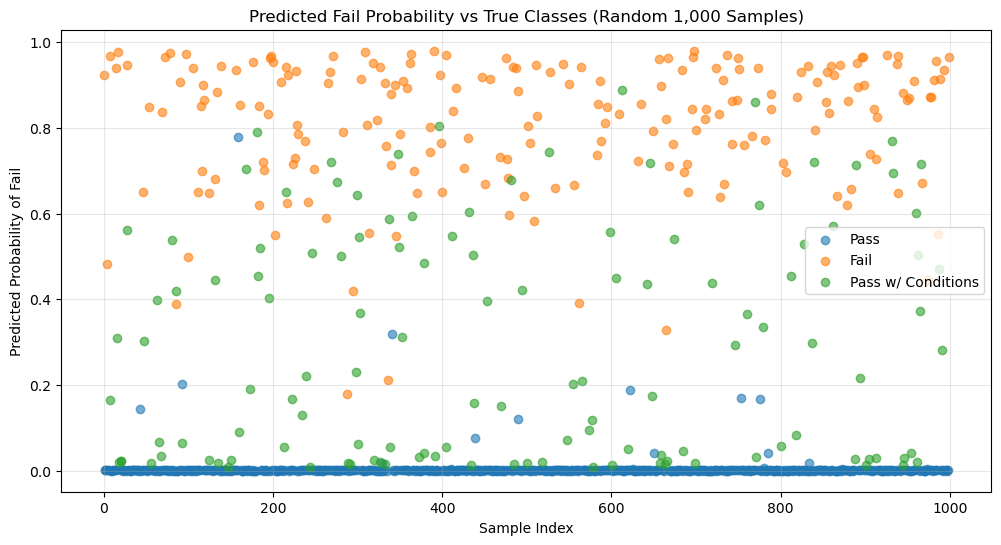

In [244]:
random_1000 = random_1000.reset_index()

color_map = {0: 'blue', 1: 'red', 2: 'green'}
labels = ['Pass', 'Fail', 'Pass w/ Conditions']

plt.figure(figsize=(12, 6))


for label in [0, 1, 2]:
    subset = random_1000[random_1000['Results'] == label]  
    plt.scatter(
        subset.index,                      
        subset['prob_fail'],             
        label=f"{labels[label]}",       
        alpha=0.6                         
    )


plt.title("Predicted Fail Probability vs True Classes (Random 1,000 Samples)")
plt.xlabel("Sample Index")
plt.ylabel("Predicted Probability of Fail")
plt.legend() 
plt.grid(True, alpha=0.3)
plt.show()

### Predict on 2014 inspection data

Use your favorite model to make predictions based on the features using the "Chicago Inspection 2014_updated.csv" file. Treat this as you would a test dataset. This means you will have to format the features (including removing some features and getting dummies) and the label (binarize and recode) in the same way you did the training data. (Remember the "Results" column is your label). You will then compare your predictions with the actual.

In [247]:
chicago_inspections_2014.columns

Index(['Inspection_ID', 'Inspection_Date', 'DBA_Name', 'AKA_Name', 'License',
       'Facility_Type', 'Risk', 'Address', 'City', 'State', 'Zip',
       'Inspection_Type', 'Latitude', 'Longitude', 'Location',
       'Facility_Type_Clean', 'criticalCount', 'seriousCount', 'minorCount',
       'pastFail', 'pastCritical', 'pastSerious', 'pastMinor', 'timeSinceLast',
       'firstRecord', 'ID', 'LICENSE_ID', 'ACCOUNT_NUMBER', 'LEGAL_NAME',
       'DOING_BUSINESS_AS_NAME', 'ADDRESS', 'CITY', 'STATE', 'ZIP_CODE',
       'WARD', 'PRECINCT', 'WARD_PRECINCT', 'POLICE_DISTRICT', 'LICENSE_CODE',
       'LICENSE_DESCRIPTION', 'BUSINESS_ACTIVITY_ID', 'BUSINESS_ACTIVITY',
       'LICENSE_NUMBER', 'APPLICATION_TYPE', 'LICENSE_TERM_START_DATE',
       'LICENSE_TERM_EXPIRATION_DATE', 'LICENSE_STATUS', 'LATITUDE',
       'LONGITUDE', 'minDate', 'maxDate', 'ageAtInspection',
       'consumption_on_premises_incidental_activity', 'tobacco',
       'package_goods', 'outdoor_patio', 'public_place_of_amusement

In [249]:
columns_to_drop = [
    'AKA_Name', 'License', 'Address', 'City', 'State', 'Zip', 
    'Latitude', 'Longitude', 'Location', 'ID', 'LICENSE_ID', 
    'LICENSE_TERM_START_DATE', 'LICENSE_TERM_EXPIRATION_DATE', 
    'LICENSE_STATUS', 'ACCOUNT_NUMBER', 'LEGAL_NAME', 
    'DOING_BUSINESS_AS_NAME', 'ADDRESS', 'CITY', 'STATE', 
    'ZIP_CODE', 'WARD', 'PRECINCT', 'LICENSE_CODE', 
    'BUSINESS_ACTIVITY_ID', 'BUSINESS_ACTIVITY', 
    'LICENSE_NUMBER', 'LATITUDE', 'LONGITUDE'
]

for column in columns_to_drop:
    if column in chicago_inspections_2014.columns:
        chicago_inspections_2014.drop(columns=[column], inplace=True)
    else:
        print(f"Warning: Column '{column}' does not exist in the dataset and will be skipped.")

chicago_inspections_2014.set_index(['Inspection_ID', 'DBA_Name'], inplace=True)
chicago_inspections_2014 = chicago_inspections_2014.dropna().drop(
    ['Inspection_Date', 'minDate', 'maxDate'], axis=1
)

y_test = chicago_inspections_2014['Results']

X_test = chicago_inspections_2014.drop(columns=['Results', 'Facility_Type', 'LICENSE_DESCRIPTION', 'WARD_PRECINCT'])
X_test = pd.get_dummies(X_test)

missing_cols = set(X.columns) - set(X_test.columns)
if missing_cols:
    print(f"The following columns are missing in X_test: {missing_cols}")
    
extra_cols = set(X_test.columns) - set(X.columns)
if extra_cols:
    print(f"The following extra columns are present in X_test: {extra_cols}")
    X_test = X_test.drop(columns=extra_cols)

X_test = X_test[X.columns]

y_test = chicago_inspections_2014['Results'].map({'Pass': 0, 'Fail': 1, 'Pass w/ Conditions': 2}).to_numpy()


Confusion Matrix for Voting Classifier (Soft Voting):



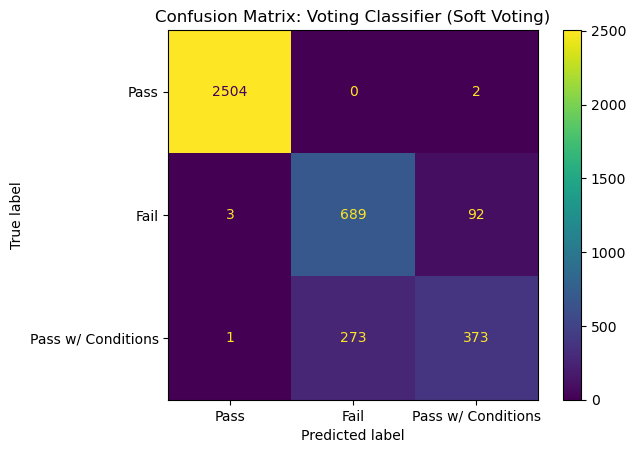

,Model,Accuracy,Macro Precision,Macro Recall,Macro F1 Score,Pass Precision,Pass Recall,Pass F1 Score,Fail Precision,Fail Recall,Fail F1 Score,Pass w/ Conditions Precision,Pass w/ Conditions Recall,Pass w/ Conditions F1 Score
0,Voting Classifier (Soft Voting),0.905766,0.837779,0.818178,0.819232,0.998405,0.999202,0.998803,0.716216,0.878827,0.789233,0.798715,0.576507,0.669659


In [259]:
# predict and compare 
# -----------
model_name = [ 'Voting Classifier (Soft Voting)' ]
model_instance = [best_model]

results_df = evaluate_models(model_name, model_instance, X, y, X_test, y_test)
results_df

In [ ]:
# evaluate
# -----------


**Why does model performance decrease?**   
Although the model does not directly overfit the training data, it may **overfit the patterns specific to the 2011–2013 data**. These patterns do not fully generalize to the test set, which consists of 2014 records, leading to reduced performance.

## 5. Discussion Questions

1. Why do we need metrics beyond accuracy when using machine learning in the social sciences and public policy?


Accuracy, as a metric, does not effectively capture the performance in multi-class classification tasks, where **imbalances and varying class priorities** can significantly affect the model’s utility.  

Accuracy reflects overall correctness but may not align with specific objectives. In some context, the focus is on **prioritizing specific classes** rather than achieving the highest overall accuracy. For instance, in cancer detection, minimizing false negatives is crucial to avoid missing diagnoses, while in spam detection, minimizing false positives is more important to avoid classifying legitimate emails as spam.  

Prediction-oriented machine learning in social sciences and public policy has significant policy implications. Therefore, solely optimizing for overall accuracy may lead to **fairness concerns**. For example, improving overall accuracy at the expense of higher false positives or false negatives for a specific group can be both unfair and problematic.

2. Imagine that establishments learned about the algorithm being used to determine who gets audited and they started adjusting their behavior (and changing certain key features about themselves that were important for the prediction) to avoid detection. How could policymakers address this interplay between algorithmic decisionmaking and real world behavior?

**YOUR ANSWER HERE**...

Even if establishments adjust their behavior opportunistically, such adjustments may have **unexpected positive consequences**. This depends on whether the relationship between key features and the prediction target is correlational or causal. If the relationship is causal, behavioral adjustments are not merely gaming strategies but can genuinely reduce the likelihood of failing inspections.

Audit target selection should not solely rely on the predicted risk calculated by the algorithm. It is essential to incorporate **random sampling** to ensure that every establishment, even those with a low predicted risk, has a chance of being selected. 

Additionally, monitoring for **behavioral drift** is critical. This can be achieved through outlier analysis, which identifies sudden, widespread changes in the distribution of key features. For instance, an increase in the prevalence of previously uncommon features could indicate shifts in behavior that require closer examination.